# Titanic Passenger Survival Prediction 

#### Project processes

* Data analysis/ exploration


* Data cleaning/ missing value imputation


#### Model Implementation

* Logistic regression


* Decision Tree Classification


* Random Forest Classification

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
os.getcwd()

'C:\\Users\\Andrew'

In [3]:
os.chdir('C://Users//Andrew/Desktop/')

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* A visual overview of the data shows how significant the missing values are to the corresponding columns


* In depth analysis will need to be done to see what is the correct procedure for handling the missing data

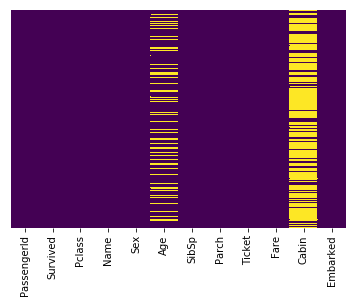

In [9]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [10]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
df.describe(include = [np.object, pd.Categorical]).T

,count,unique,top,freq
Name,891,891,"Thomas, Master. Assad Alexander",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
order1 = ['Name', 'Age', 'SibSp']
order2 = ['PassengerId', 'Parch','Ticket', 'Fare', 'Cabin']
order3 = ['Embarked', 'Pclass','Sex', 'Survived']

In [14]:
new_col_order = order1 + order2 + order3

In [15]:
set(df.columns) == set(new_col_order)

True

In [16]:
df2 = df[new_col_order]

In [17]:
# Dropping PassengerId from the dataframe because it has no value

df2.drop(['PassengerId'], axis = 1, inplace= True)

C:\Users\Andrew\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
df2.head()

,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Sex,Survived
0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,3,male,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,female,1
2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,female,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,female,1
4,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,3,male,0


In [19]:
# The data shows that there were 891 passengers on board of which 577 were male

df2['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

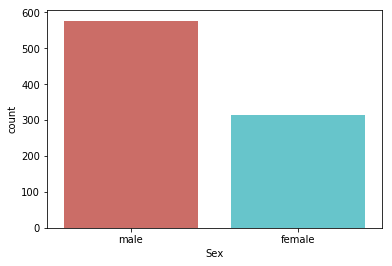

In [20]:
sns.countplot(x = 'Sex', data = df2, palette = 'hls')

## Passenger Survival Analysis

In [21]:
# How many passengers survived?

# 1 is an indication of passenger survival

df2['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

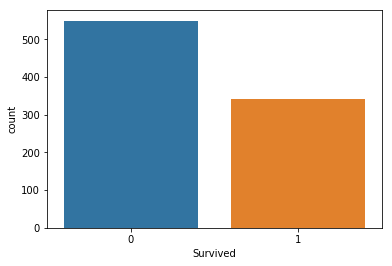

In [22]:
sns.countplot(x = 'Survived', data = df2)

* We see from the data that there were significantly more passengers from the 3rd class that did not survive and that there were more passengers from the 1st class that did survive than didn't


* It is possible that the wealthier passengers from the upper classs were given priority for survival over the lower tier classes


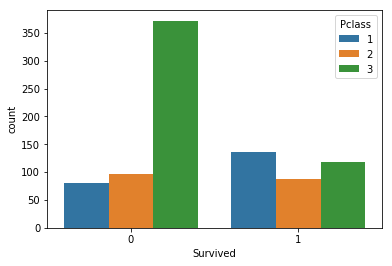

In [23]:
sns.countplot(x = 'Survived', data = df2, hue = 'Pclass')

## Save the women and children

* The common adage is save the women and children first


* We see that more passengers of the first class survived, now we should analyze how the ratio in which women of specific classes survived to men


In [24]:
df2.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

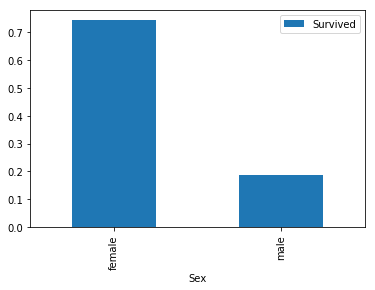

In [25]:
df2[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()

In [26]:
female_total = 314
survived_females = 233
percentage_of_females_survived = survived_females / female_total
print('The percentage of female passengers that survived from the total amount of female passengers is about {:.2} %' .format(percentage_of_females_survived))

The percentage of female passengers that survived from the total amount of female passengers is about 0.74 %


## ... from which class???

* So a high percentage of women were saved 


* Was there a specific class that had more women saved than not, and for explorations sake, what was the ratio of men and women that were saved from each class

In [27]:
# So all in all the data shows what was assumed. Individuals of the higher classes were more likely to be saved at a very high percentage

pd.crosstab([df2.Sex, df2.Survived], df2.Pclass, margins = True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

## Handling Missing Values 


* How much of the data is missing?


* After knowing the percentage of the missing data, how will me handle it? Dropping the data completely? Imputation, and if so how will we impute it and why is this method chosen?


In [28]:
available_age = df2['Age'].count()

In [29]:
missing_age_values = df2['Age'].isnull().sum()

In [30]:
total_age_values = missing_age_values + available_age

In [31]:
percentage_of_missing_age = missing_age_values / total_age_values
print('The missing percentage of age values from the data is roughly {:.2f} %'.format(percentage_of_missing_age))

The missing percentage of age values from the data is roughly 0.20 %


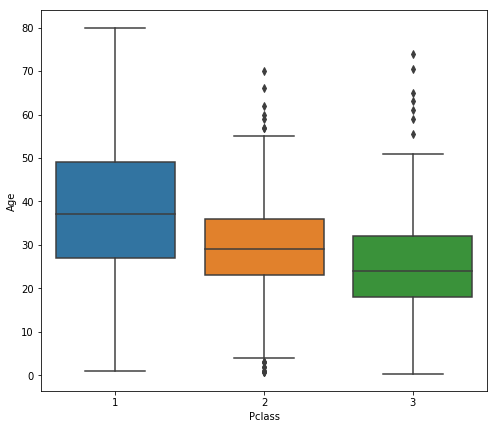

In [32]:
plt.figure(figsize = (8, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df2)

In [33]:
df2.groupby('Pclass').mean()

,Age,SibSp,Parch,Fare,Survived
Pclass,,,,,
1,38.233441,0.416667,0.356481,84.154687,0.629630
2,29.877630,0.402174,0.380435,20.662183,0.472826
3,25.140620,0.615071,0.393075,13.675550,0.242363


In [34]:
# Age imputation function

def age_imputation(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age


In [35]:
df2['Age'] = df2[['Age', 'Pclass']].apply(age_imputation, axis = 1)

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
hist_df = df2.groupby('Survived')

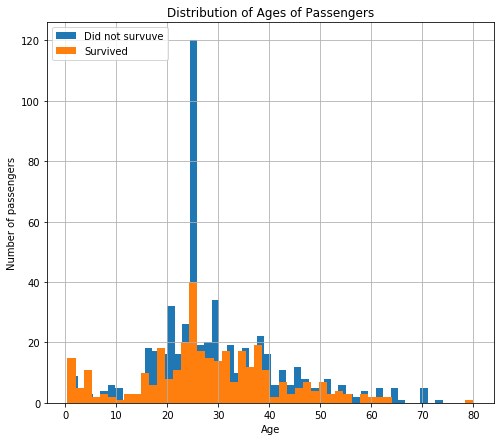

In [37]:
plt.figure(figsize = (8, 7))
hist_df['Age'].hist(bins = 50, label = hist_df['Survived'])
plt.title('Distribution of Ages of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend(('Did not survuve', 'Survived'), loc = 'upper left')
plt.show()

### Without calculating any numbers we can see that there is a very significant amount of the cabin data missing

In [38]:
missing_cabin_data = df2['Cabin'].isnull().sum()

In [39]:
available_cabin_data = df2['Cabin'].count()

In [40]:
total_cabin_values = available_cabin_data + missing_cabin_data

In [41]:
percentage_of_missing_cabin_data = missing_cabin_data / total_cabin_values
print('The missing percentage of cabin data is roughly {:.2f} %'.format(percentage_of_missing_cabin_data))

The missing percentage of cabin data is roughly 0.77 %


* Too much missing data to impute

In [42]:
df2.drop(['Cabin'], axis = 1, inplace= True)

C:\Users\Andrew\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Categorical Data

* Looking at the categorical data, we will not use the name or ticket for our machine learning algorithms


* The embarked and sex column will need to be converted to dummy variables for the models. 

In [43]:
categorical = df2.select_dtypes(exclude = [np.number])
categorical.head()

,Name,Ticket,Embarked,Sex
0,"Braund, Mr. Owen Harris",A/5 21171,S,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C,female
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,S,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,S,female
4,"Allen, Mr. William Henry",373450,S,male


In [44]:
sex = pd.get_dummies(df2['Sex'], drop_first= True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [45]:
embarked = pd.get_dummies(df2['Embarked'], drop_first= True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [46]:
passenger_class = pd.get_dummies(df2['Pclass'], drop_first= True)
passenger_class.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [47]:
df2 = pd.concat([df2, sex, embarked, passenger_class], axis = 1)
df2.head()

,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass,Sex,Survived,male,Q,S,2,3
0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,3,male,0,1,0,1,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,female,1,0,0,0,0,0
2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,3,female,1,0,0,1,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,female,1,0,0,1,0,0
4,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,3,male,0,1,0,1,0,1


In [48]:
df2.columns

Index([    'Name',      'Age',    'SibSp',    'Parch',   'Ticket',     'Fare',
       'Embarked',   'Pclass',      'Sex', 'Survived',     'male',        'Q',
              'S',          2,          3],
      dtype='object')

In [49]:
df2.rename(columns = {2:'class2', 3:'class3'}, inplace = True)

In [50]:
df2.columns

Index(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Pclass',
       'Sex', 'Survived', 'male', 'Q', 'S', 'class2', 'class3'],
      dtype='object')

### Logistic Regression Model Implementation

In [51]:
X = df2[['Age', 'male', 'Fare', 'SibSp','Q', 'S', 'class2', 'class3']]

y = df2['Survived']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
logistic_model = LogisticRegression()

In [54]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
logistic_predictions = logistic_model.predict(X_test)

In [56]:
print(classification_report(y_test, logistic_predictions))
print('\n')
print(confusion_matrix(y_test, logistic_predictions))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       157
          1       0.80      0.70      0.75       111

avg / total       0.80      0.80      0.80       268



[[137  20]
 [ 33  78]]


### Decision Tree

In [57]:
decision_tree = DecisionTreeClassifier()

In [58]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
tree_predictions = decision_tree.predict(X_test)

In [60]:
print(classification_report(y_test, tree_predictions))
print('\n')
print(confusion_matrix(y_test, tree_predictions))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81       157
          1       0.73      0.70      0.72       111

avg / total       0.77      0.77      0.77       268



[[128  29]
 [ 33  78]]


### Random Forest Implementation

In [61]:
forest = RandomForestClassifier()

In [62]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
forest_predictions = forest.predict(X_test)

In [64]:
print(classification_report(y_test, forest_predictions))
print('\n')
print(confusion_matrix(y_test, forest_predictions))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       157
          1       0.79      0.72      0.75       111

avg / total       0.81      0.81      0.80       268



[[136  21]
 [ 31  80]]


In [65]:
print('Accuracy of logistic regression model is {:.2f} %'.format(logistic_model.score(X_test, y_test)))
print('Accuracy of decision tree model is {:.2f} %'.format(decision_tree.score(X_test, y_test)))
print('Accuracy of random forest model is {:.2f} %'.format(forest.score(X_test, y_test)))

Accuracy of logistic regression model is 0.80 %
Accuracy of decision tree model is 0.77 %
Accuracy of random forest model is 0.81 %
